In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter
from wordcloud import WordCloud
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import os , re 

C:\Users\oscar\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("../data/cleaned_data/cleaned_data.csv")
df.head()

,text_cleaned,targe,tokens
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,culture,"['بين', 'أستوديوهات', 'ورزازات', 'وصحراء', 'مر..."
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,culture,"['قررت', 'النجمة', 'الأمريكية', 'أوبرا', 'وينف..."
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,culture,"['أخبارنا', 'المغربية', 'الوزاني', 'تصوير', 'ا..."
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,culture,"['اخبارنا', 'المغربية', 'قال', 'ابراهيم', 'الر..."
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,culture,"['تزال', 'صناعة', 'الجلود', 'في', 'المغرب', 'ت..."


In [3]:
df['targe'].nunique()

5

In [3]:
df['tokens'] = df['text_cleaned'].apply(word_tokenize)

In [ ]:
df['tokens'] .head()

0    [بين, أستوديوهات, ورزازات, وصحراء, مرزوكة, وآث...
1    [قررت, النجمة, الأمريكية, أوبرا, وينفري, ألا, ...
2    [أخبارنا, المغربية, الوزاني, تصوير, الشملالي, ...
3    [اخبارنا, المغربية, قال, ابراهيم, الراشدي, محا...
4    [تزال, صناعة, الجلود, في, المغرب, تتبع, الطريق...
Name: tokens, dtype: object

In [5]:
counter = Counter()
df['tokens'].apply(counter.update)
print()

In [6]:
counter.most_common(10)

[('في', 902845),
 ('من', 705023),
 ('على', 420439),
 ('أن', 405450),
 ('إلى', 356539),
 ('التي', 218539),
 ('الذي', 168808),
 ('عن', 155890),
 ('مع', 127441),
 ('ما', 113383)]

In [7]:
counter.most_common(50)

[('في', 902845),
 ('من', 705023),
 ('على', 420439),
 ('أن', 405450),
 ('إلى', 356539),
 ('التي', 218539),
 ('الذي', 168808),
 ('عن', 155890),
 ('مع', 127441),
 ('ما', 113383),
 ('بعد', 109817),
 ('هذا', 81309),
 ('خلال', 77807),
 ('المغرب', 76146),
 ('قبل', 75251),
 ('هذه', 71419),
 ('الفريق', 69882),
 ('بين', 68137),
 ('أنه', 64289),
 ('لا', 63813),
 ('المغربية', 60286),
 ('لم', 56944),
 ('كان', 56883),
 ('كما', 55289),
 ('الوطني', 50994),
 ('أجل', 48992),
 ('إذ', 47823),
 ('كل', 46700),
 ('أو', 46648),
 ('محمد', 45377),
 ('أمام', 42794),
 ('الماضي', 42775),
 ('الرياضي', 42128),
 ('عبد', 41352),
 ('العام', 41030),
 ('المغربي', 40795),
 ('إن', 39038),
 ('ذلك', 38845),
 ('رئيس', 38270),
 ('اليوم', 36952),
 ('الحكومة', 35918),
 ('سنة', 35903),
 ('القدم', 35413),
 ('المنتخب', 35374),
 ('المباراة', 34738),
 ('له', 34218),
 ('غير', 33427),
 ('وفي', 33285),
 ('الوطنية', 32866),
 ('حيث', 32419)]

In [8]:
#we will keep it when do senetence embedding to give actual meaning of data

In [9]:
#as we see we have must drop this stop words 

In [10]:
counter_sorted = sorted(counter.items() , key= lambda x : x[1] , reverse=True)
counter_sorted

[('في', 902845),
 ('من', 705023),
 ('على', 420439),
 ('أن', 405450),
 ('إلى', 356539),
 ('التي', 218539),
 ('الذي', 168808),
 ('عن', 155890),
 ('مع', 127441),
 ('ما', 113383),
 ('بعد', 109817),
 ('هذا', 81309),
 ('خلال', 77807),
 ('المغرب', 76146),
 ('قبل', 75251),
 ('هذه', 71419),
 ('الفريق', 69882),
 ('بين', 68137),
 ('أنه', 64289),
 ('لا', 63813),
 ('المغربية', 60286),
 ('لم', 56944),
 ('كان', 56883),
 ('كما', 55289),
 ('الوطني', 50994),
 ('أجل', 48992),
 ('إذ', 47823),
 ('كل', 46700),
 ('أو', 46648),
 ('محمد', 45377),
 ('أمام', 42794),
 ('الماضي', 42775),
 ('الرياضي', 42128),
 ('عبد', 41352),
 ('العام', 41030),
 ('المغربي', 40795),
 ('إن', 39038),
 ('ذلك', 38845),
 ('رئيس', 38270),
 ('اليوم', 36952),
 ('الحكومة', 35918),
 ('سنة', 35903),
 ('القدم', 35413),
 ('المنتخب', 35374),
 ('المباراة', 34738),
 ('له', 34218),
 ('غير', 33427),
 ('وفي', 33285),
 ('الوطنية', 32866),
 ('حيث', 32419),
 ('الأول', 31485),
 ('بعض', 30963),
 ('وهو', 30957),
 ('هو', 30813),
 ('مباراة', 30776),
 ('المقبل

In [19]:
#apply word count with tf-idf to focus only on unique words not frequent words 

In [4]:
def count_words(df , column , min_freq = 2):
    counter = Counter()
    df[column].apply(counter.update)
    
    freq_df = pd.DataFrame.from_dict(counter , orient='index' , columns=['freq'])
    
    freq_df = freq_df[freq_df['freq'] >= min_freq]
    
    freq_df.index.name = 'tokens'
    
    return freq_df.sort_values(by="freq" , ascending=False)

In [8]:
freq_df = count_words(df  , 'tokens')
freq_df.head()

,freq
tokens,
في,902845
من,705023
على,420439
أن,405450
إلى,356539


In [6]:
def word_colud(word_freq , title = None , max_words = 200 ):
    font = "../../topic-modeling/Noto_Sans_Arabic/NotoSansArabic-VariableFont_wdth,wght.ttf"
    wc = WordCloud(font_path= font , width=1000 , height=600 , background_color='black' , 
                   colormap='Paired' , max_font_size=100 , max_words=max_words)
    
    if isinstance(word_freq , pd.Series):
        counter = Counter(word_freq.fillna(0).to_dict())
    else :
        if not isinstance(word_freq , Counter):
            raise TypeError("type of word_freq must be a Counter or Series.")
        counter = word_freq
    rtl = lambda w: get_display(reshape(w))
    counter = {"".join(reversed(rtl(w))):f for w, f in counter.items()}
    wc.generate_from_frequencies(counter)
    
    plt.title(title)
    plt.imshow(wc , interpolation='bilinear')
    plt.axis("off")

In [5]:
def compute_idf(df, column , min_df = 2):
    
    #count objects 
    counter = Counter()
    df[column].apply(counter.update)
    
    idf_df = pd.DataFrame.from_dict(counter , orient="index" , columns=['df'])
    
    idf_df = idf_df[idf_df['df'] >= min_df]
    
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    
    idf_df.index.name = 'tokens'
    return idf_df

In [6]:
idf_df = compute_idf(df , column='tokens')

In [9]:
idf_df.head()

,df,idf
tokens,,
بين,68137,0.563883
أستوديوهات,9,9.495934
ورزازات,704,5.136381
وصحراء,8,9.613717
مرزوكة,38,8.055573


In [9]:
freq_df['tfidf'] = freq_df['freq']  * idf_df['idf']
freq_df.head()

,freq,tfidf
tokens,,
في,902845,-1.823880e+06
من,705023,-1.249884e+06
على,420439,-5.280276e+05
أن,405450,-4.944844e+05
إلى,356539,-3.889983e+05


In [39]:

counter.most_common(10)[0][0]

'في'

In [78]:
[*reversed("llcd")]

['d', 'c', 'l', 'l']

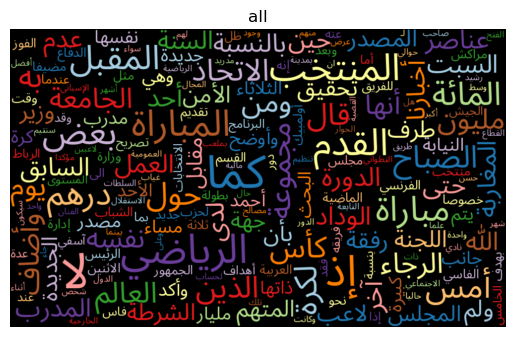

In [82]:
word_colud(counter , title='all')

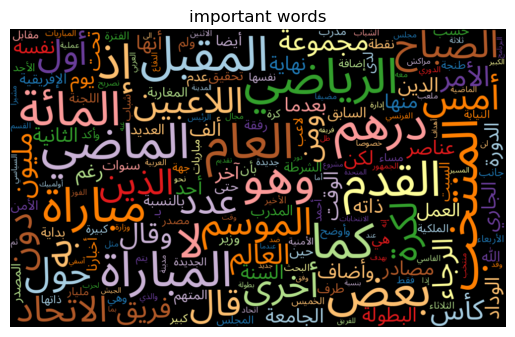

In [83]:
word_colud(freq_df['tfidf'] , title = 'important words')

In [10]:
arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))
print(len(arabic_stopwords))

701


In [11]:
def ngrams(tokens , n=2 , stopwords = set()):
    ngrams_tokens = [" ".join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
                     if all([n for n in ngram if n not in stopwords])]
    return ngrams_tokens

In [26]:
df['tokens'].head()

0    [بين, أستوديوهات, ورزازات, وصحراء, مرزوكة, وآث...
1    [قررت, النجمة, الأمريكية, أوبرا, وينفري, ألا, ...
2    [أخبارنا, المغربية, الوزاني, تصوير, الشملالي, ...
3    [اخبارنا, المغربية, قال, ابراهيم, الراشدي, محا...
4    [تزال, صناعة, الجلود, في, المغرب, تتبع, الطريق...
Name: tokens, dtype: object

In [12]:
df['bigrams'] = df['tokens'].apply(ngrams , n=2 , stopwords = arabic_stopwords)

In [40]:
df.head()

,text_cleaned,targe,tokens,bigrams
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,0,"[بين, أستوديوهات, ورزازات, وصحراء, مرزوكة, وآث...","[بين أستوديوهات, أستوديوهات ورزازات, ورزازات و..."
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,0,"[قررت, النجمة, الأمريكية, أوبرا, وينفري, ألا, ...","[قررت النجمة, النجمة الأمريكية, الأمريكية أوبر..."
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,0,"[أخبارنا, المغربية, الوزاني, تصوير, الشملالي, ...","[أخبارنا المغربية, المغربية الوزاني, الوزاني ت..."
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,0,"[اخبارنا, المغربية, قال, ابراهيم, الراشدي, محا...","[اخبارنا المغربية, المغربية قال, قال ابراهيم, ..."
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,0,"[تزال, صناعة, الجلود, في, المغرب, تتبع, الطريق...","[تزال صناعة, صناعة الجلود, الجلود في, في المغر..."


In [29]:
count_words(df , "bigrams").head(5)

,freq
tokens,
من أجل,47010
إلى أن,30831
في المائة,26763
لكرة القدم,23854
قبل أن,22682


In [13]:
idf_df = pd.concat([idf_df , compute_idf(df , "bigrams", min_df=10)])
idf_df.head()

,df,idf
tokens,,
بين,68137,0.563883
أستوديوهات,9,9.495934
ورزازات,704,5.136381
وصحراء,8,9.613717
مرزوكة,38,8.055573


In [31]:
freq_df = count_words(df , "bigrams")
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

In [32]:
freq_df.head()

,freq,tfidf
tokens,,
من أجل,47010,43956.385517
إلى أن,30831,41834.058768
في المائة,26763,40101.232475
لكرة القدم,23854,38487.277485
قبل أن,22682,37739.037113


In [14]:
def word_colud(word_freq , title = None , max_words = 200 ):
    font = "../../topic-modeling/Noto_Sans_Arabic/NotoSansArabic-VariableFont_wdth,wght.ttf"
    wc = WordCloud(font_path= font , width=1000 , height=600 , background_color='black' , 
                   colormap='Paired' , max_font_size=100 , max_words=max_words)
    
    if isinstance(word_freq , pd.Series):
        counter = Counter(word_freq.fillna(0).to_dict())
    else :
        if not isinstance(word_freq , Counter):
            raise TypeError("type of word_freq must be a Counter or Series.")
        counter = word_freq
    #rtl = lambda w: get_display(reshape(w))
    counter = {w:f for w, f in counter.items()}
    wc.generate_from_frequencies(counter)
    
    plt.title(title)
    plt.imshow(wc , interpolation='bilinear')
    plt.axis("off")

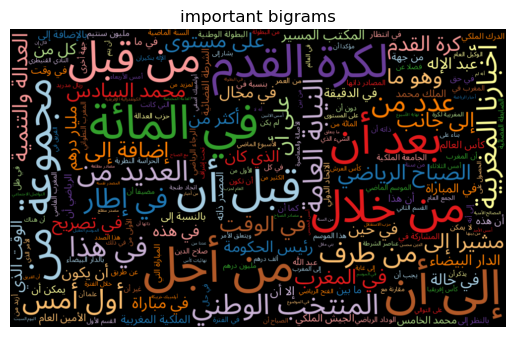

In [38]:
word_colud(freq_df['tfidf'] , 'important bigrams')

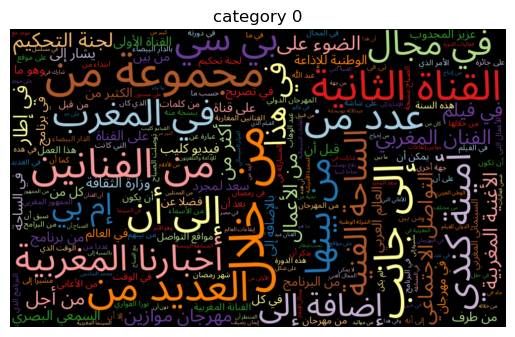

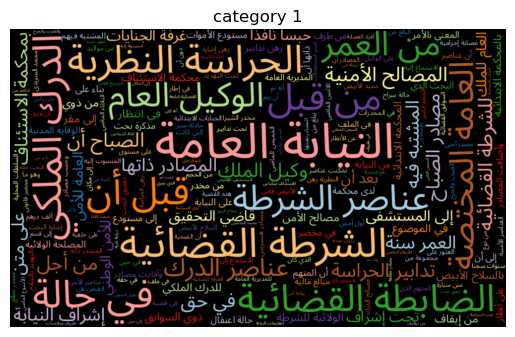

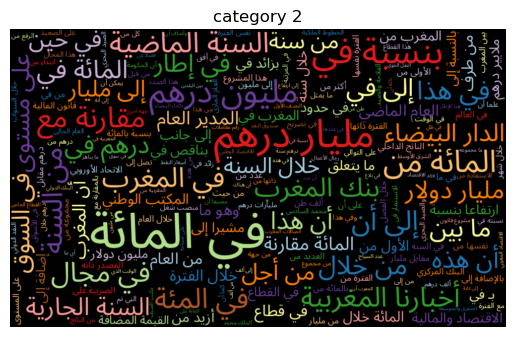

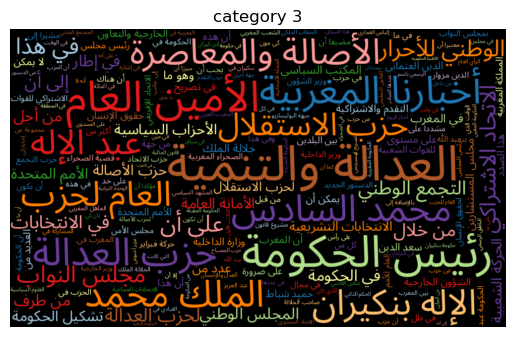

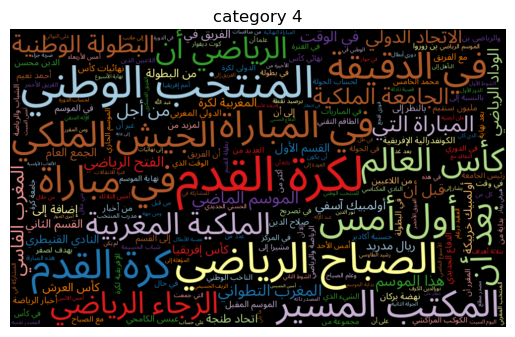

In [15]:
for category in df['targe'].unique():
    selected_df = df[df['targe']==category]
    freq_df = count_words(selected_df , "bigrams")
    freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
    
    word_colud(freq_df['tfidf'] , f"category {category}")
    plt.show()
    

In [16]:
mapping = {0 :'culture',  1 : 'diverse', 2 : 'economy', 3: 'politic' , 4 :'sports'}
df['targe'] = df['targe'].map(mapping)

In [17]:
df.head()

,text_cleaned,targe,tokens,bigrams
0,بين أستوديوهات ورزازات وصحراء مرزوكة وآثار ولي...,culture,"[بين, أستوديوهات, ورزازات, وصحراء, مرزوكة, وآث...","[بين أستوديوهات, أستوديوهات ورزازات, ورزازات و..."
1,قررت النجمة الأمريكية أوبرا وينفري ألا يقتصر ع...,culture,"[قررت, النجمة, الأمريكية, أوبرا, وينفري, ألا, ...","[قررت النجمة, النجمة الأمريكية, الأمريكية أوبر..."
2,أخبارنا المغربية الوزاني تصوير الشملالي ألهب ا...,culture,"[أخبارنا, المغربية, الوزاني, تصوير, الشملالي, ...","[أخبارنا المغربية, المغربية الوزاني, الوزاني ت..."
3,اخبارنا المغربية قال ابراهيم الراشدي محامي سعد...,culture,"[اخبارنا, المغربية, قال, ابراهيم, الراشدي, محا...","[اخبارنا المغربية, المغربية قال, قال ابراهيم, ..."
4,تزال صناعة الجلود في المغرب تتبع الطريقة التقل...,culture,"[تزال, صناعة, الجلود, في, المغرب, تتبع, الطريق...","[تزال صناعة, صناعة الجلود, الجلود في, في المغر..."


In [18]:
df[['text_cleaned' , "targe" , "tokens"]].to_csv("../data/cleaned_data/cleaned_data.csv" , index=False , header=True)